In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matplotlib import markers
import itertools
import math

In [407]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
#X=np.unique(X, axis=0)
markers = markers.MarkerStyle.markers
colormap = plt.cm.Dark2.colors

In [408]:
distances = squareform(pdist(X, metric='euclidean'))
np.fill_diagonal(distances, np.inf)
distance_matrix=distances

In [409]:
num_points = X.shape[0]
X_data = np.c_[X, np.arange(0, num_points, 1)]

In [410]:
X_data.shape

(200, 3)

In [411]:
clusters = np.c_[distances, np.zeros((num_points, 2))]

In [412]:
dist_col_id = num_points
clust_col_id = num_points + 1

In [413]:
clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)

In [414]:
def find_clusters_to_merge(clusters, dist_col_id, clust_col_id):
    c1_ind=np.argmin(clusters[:,dist_col_id])
    c2_ind=clusters[c1_ind, clust_col_id].astype(int)
    distance=clusters[c1_ind, dist_col_id]
    return c1_ind, c2_ind, distance

In [415]:
def single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
    
    for i in range(num_points):
        if clusters[i, c1_ind] > clusters[i, c2_ind]:
            clusters[i, c1_ind]=clusters[i, c2_ind]
            
    for j in range (num_points):
        if clusters[c1_ind, j] > clusters[c2_ind, j]:
            clusters[c1_ind, j]=clusters[c2_ind, j]
            
    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return  X_data, clusters, dist_col_id, clust_col_id

In [416]:
def complete_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
    
    for i in range(num_points):
        if clusters[i, c1_ind] < clusters[i, c2_ind]:
            clusters[i, c1_ind]=clusters[i, c2_ind]
            
    for j in range (num_points):
        if clusters[c1_ind, j] < clusters[c2_ind, j]:
            clusters[c1_ind, j]=clusters[c2_ind, j]

    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return  X_data, clusters, dist_col_id, clust_col_id

In [417]:
def average_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id, distance_matrix):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
        
    for i in range(num_points):
        dist=0
        m=0
        for j in range (X_data.shape[0]):
            if X_data[j, 2]==i:
                for k in range(X_data.shape[0]):
                    if X_data[k, 2]==c1_ind or X_data[k, 2]==c2_ind:
                        dist+=distance_matrix[j, k]
                        m+=1
        dist=dist/m
        clusters[i, c1_ind]=dist
            
    for j in range (num_points):
        dist=0
        m=0
        for i in range (X_data.shape[0]):
            if X_data[i, 2]==j:
                for k in range(X_data.shape[0]):
                    if X_data[k, 2]==c1_ind or X_data[k, 2]==c2_ind:
                        dist+=distance_matrix[i, k]
                        m+=1
        dist=dist/m
        clusters[c1_ind, j]=dist

    clusters=np.delete(clusters, c2_ind, 1)
    clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        if X_data[i,2]>c2_ind:
            X_data[i,2]=X_data[i,2]-1
        
    dist_col_id-=1
    clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    return X_data, clusters, dist_col_id, clust_col_id

Merging clusters # 48 49


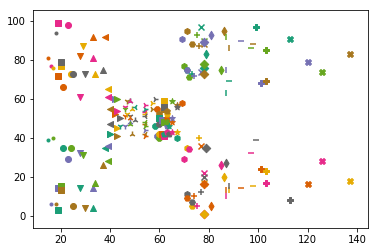

Merging clusters # 64 67
Merging clusters # 127 129
Merging clusters # 153 155
Merging clusters # 21 23
Merging clusters # 49 51
Merging clusters # 57 58
Merging clusters # 59 61
Merging clusters # 60 61
Merging clusters # 61 62
Merging clusters # 66 69
Merging clusters # 67 68
Merging clusters # 68 70
Merging clusters # 69 71
Merging clusters # 80 85
Merging clusters # 82 85
Merging clusters # 86 91
Merging clusters # 87 94
Merging clusters # 89 90
Merging clusters # 91 96
Merging clusters # 101 102
Merging clusters # 129 135
Merging clusters # 130 134
Merging clusters # 147 151
Merging clusters # 80 85
Merging clusters # 3 5
Merging clusters # 9 11
Merging clusters # 23 25
Merging clusters # 36 38
Merging clusters # 47 50
Merging clusters # 50 53


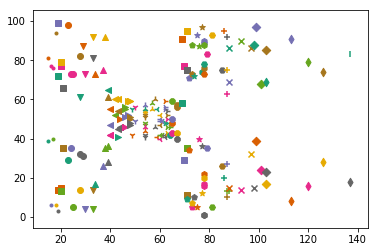

Merging clusters # 56 59
Merging clusters # 72 74
Merging clusters # 83 86
Merging clusters # 97 102
Merging clusters # 106 108
Merging clusters # 115 124
Merging clusters # 59 66
Merging clusters # 60 63
Merging clusters # 115 117
Merging clusters # 72 75
Merging clusters # 9 12
Merging clusters # 79 84
Merging clusters # 76 81
Merging clusters # 49 53
Merging clusters # 2 5
Merging clusters # 10 11
Merging clusters # 62 65
Merging clusters # 73 76
Merging clusters # 76 77
Merging clusters # 87 89
Merging clusters # 90 92
Merging clusters # 102 105
Merging clusters # 105 107
Merging clusters # 112 118
Merging clusters # 117 121
Merging clusters # 0 4
Merging clusters # 40 42
Merging clusters # 59 61
Merging clusters # 61 66
Merging clusters # 80 84


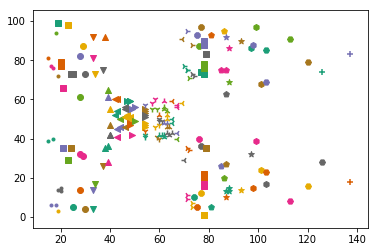

Merging clusters # 84 87
Merging clusters # 94 101
Merging clusters # 104 108
Merging clusters # 117 119
Merging clusters # 121 125
Merging clusters # 122 125
Merging clusters # 66 70
Merging clusters # 62 64
Merging clusters # 83 86
Merging clusters # 54 55
Merging clusters # 55 56
Merging clusters # 46 49
Merging clusters # 70 72
Merging clusters # 60 61
Merging clusters # 30 35
Merging clusters # 82 88
Merging clusters # 10 14
Merging clusters # 21 23
Merging clusters # 59 64
Merging clusters # 64 66
Merging clusters # 61 63
Merging clusters # 24 26
Merging clusters # 35 39
Merging clusters # 68 72
Merging clusters # 89 93
Merging clusters # 41 46
Merging clusters # 33 36
Merging clusters # 38 39
Merging clusters # 57 58
Merging clusters # 40 42


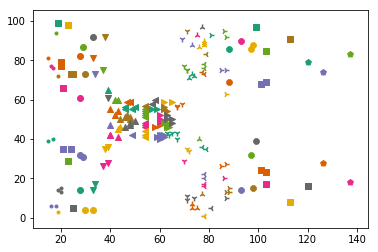

Merging clusters # 73 76
Merging clusters # 52 55
Merging clusters # 26 28
Merging clusters # 30 35
Merging clusters # 2 5
Merging clusters # 81 82
Merging clusters # 46 48
Merging clusters # 32 34
Merging clusters # 36 37
Merging clusters # 3 8
Merging clusters # 38 40
Merging clusters # 7 11
Merging clusters # 39 40
Merging clusters # 32 33
Merging clusters # 42 43
Merging clusters # 47 51
Merging clusters # 45 49
Merging clusters # 52 56
Merging clusters # 58 59
Merging clusters # 39 41
Merging clusters # 50 53
Merging clusters # 35 37
Merging clusters # 39 41
Merging clusters # 46 47
Merging clusters # 49 51
Merging clusters # 20 26
Merging clusters # 52 54
Merging clusters # 29 30
Merging clusters # 14 17
Merging clusters # 61 65


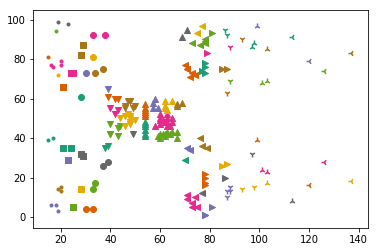

Merging clusters # 1 3
Merging clusters # 36 37
Merging clusters # 24 25
Merging clusters # 10 17
Merging clusters # 58 60
Merging clusters # 30 31
Merging clusters # 35 37
Merging clusters # 46 50
Merging clusters # 3 6
Merging clusters # 11 17
Merging clusters # 8 13
Merging clusters # 47 50
Merging clusters # 25 26
Merging clusters # 12 16
Merging clusters # 33 40
Merging clusters # 4 7
Merging clusters # 31 35
Merging clusters # 39 41
Merging clusters # 9 13
Merging clusters # 48 50
Merging clusters # 29 34
Merging clusters # 6 7
Merging clusters # 26 31
Merging clusters # 17 20
Merging clusters # 41 42
Merging clusters # 40 45
Merging clusters # 22 23
Merging clusters # 17 19
Merging clusters # 46 48
Merging clusters # 4 7


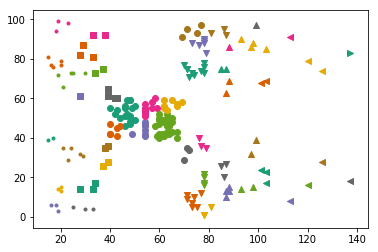

Merging clusters # 23 27
Merging clusters # 33 35
Merging clusters # 29 34
Merging clusters # 13 14
Merging clusters # 21 25
Merging clusters # 24 26
Merging clusters # 28 29
Merging clusters # 2 5
Merging clusters # 17 19
Merging clusters # 1 4
Merging clusters # 15 17
Merging clusters # 21 23
Merging clusters # 25 27
Merging clusters # 29 31
Merging clusters # 7 9
Merging clusters # 12 13
Merging clusters # 15 20
Merging clusters # 5 6
Merging clusters # 0 4
Merging clusters # 11 12
Merging clusters # 9 10
Merging clusters # 15 17
Merging clusters # 2 4
Merging clusters # 4 6
Merging clusters # 11 14
Merging clusters # 21 22
Merging clusters # 15 16
Merging clusters # 14 18
Merging clusters # 18 20
Merging clusters # 1 5


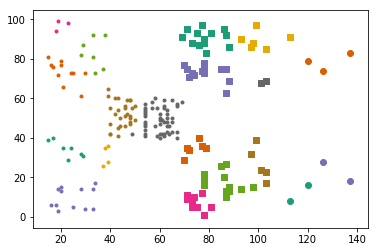

Merging clusters # 11 12
Merging clusters # 0 5
Merging clusters # 1 4
Merging clusters # 4 5
Merging clusters # 5 7
Merging clusters # 11 13
Merging clusters # 8 10
Merging clusters # 1 3
Merging clusters # 5 6
Merging clusters # 0 2
Merging clusters # 4 6
Merging clusters # 3 5
Merging clusters # 0 2
Merging clusters # 3 4
Merging clusters # 2 4
Merging clusters # 0 1
Merging clusters # 0 2
Merging clusters # 0 1


In [418]:
threshold=None
merge_distances = np.zeros(num_points - 1)
for i in range(0, num_points - 1):
    c1_ind, c2_ind, distance=find_clusters_to_merge(clusters, dist_col_id, clust_col_id)

    #if threshold is set, we don't merge any further if we reached the desired max distance for merging
    if threshold is not None and distance > threshold:
        break
    merge_distances[i] = distance
    #single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    #complete_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    #average_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id, distance_matrix)

    #X_data, clusters, dist_col_id, clust_col_id= single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    #X_data, clusters, dist_col_id, clust_col_id= complete_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
    X_data, clusters, dist_col_id, clust_col_id= average_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id, distance_matrix)
    #uncomment when testing
    print("Merging clusters #", c1_ind, c2_ind)
    if i%30 == 0:
         for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
             plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker, label=k)
         plt.show()

In [283]:
c2_ind

68

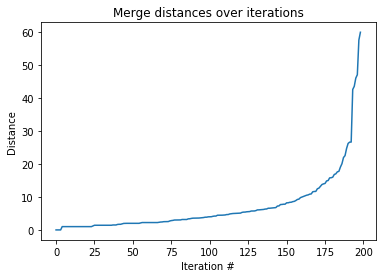

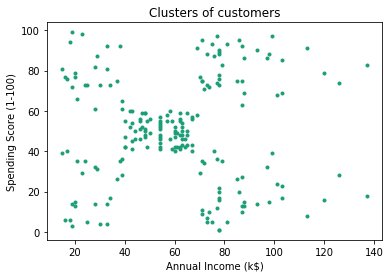

In [420]:
# todo use the plot below to find the optimal threshold to stop merging clusters
plt.plot(np.arange(0, num_points - 1, 1), merge_distances[:num_points - 1])
plt.title("Merge distances over iterations")
plt.xlabel("Iteration #")
plt.ylabel("Distance")
plt.show()

for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
    plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [74]:
delta0=1
for i in range(1, len(merge_distances)):
    delta=merge_distances[i]-merge_distances[i-1]
    print(delta, delta0)
    if delta>100*delta0 and delta0!=0:
        threshold=merge_distances[i]
        break
    delta0=delta

0.0 1
0.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.41421356237309515 0.0
0.0 0.41421356237309515
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.5857864376269049 0.0
0.0 0.5857864376269049
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.2360679774997898 0.0
0.0 0.2360679774997898
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.5923591472464005 0.0
0.0 0.5923591472464005
0.0 0.0
0.0 0.0
0.0 0.0
0.1715728752538097 0.0
0.0 0.1715728752538097
0.0 0.0
0.0 0.0
0.0 0.0
0.16227766016837952 0.0
0.0 0.16227766016837952
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.4432736152956096 0.0
0.0 0.4432736152956096
0.3944487245360109 0.0
0.0 0.3944487245360109
0.12310562561766059 0.0
0.0 0.12310562561766059
0.0 0.0
0.0 0.

In [ ]:
math.inf

In [60]:
X_data

array([[ 15,  39,   0],
       [ 15,  81,   1],
       [ 16,   6,   2],
       [ 16,  77,   3],
       [ 17,  40,   0],
       [ 17,  76,   3],
       [ 18,   6,   2],
       [ 18,  94,   1],
       [ 19,   3,   8],
       [ 19,  72,   9],
       [ 19,  14,  10],
       [ 19,  99,  11],
       [ 20,  15,  10],
       [ 20,  77,  13],
       [ 20,  13,  14],
       [ 20,  79,  13],
       [ 21,  35,  16],
       [ 21,  66,   9],
       [ 23,  29,  18],
       [ 23,  98,  11],
       [ 24,  35,  16],
       [ 24,  73,  21],
       [ 25,   5,   8],
       [ 25,  73,  21],
       [ 28,  14,  14],
       [ 28,  82,  25],
       [ 28,  32,  26],
       [ 28,  61,  18],
       [ 29,  31,  26],
       [ 29,  87,  25],
       [ 30,   4,  30],
       [ 30,  73,  31],
       [ 33,   4,  30],
       [ 33,  92,  33],
       [ 33,  14,  34],
       [ 33,  81,  31],
       [ 34,  17,  34],
       [ 34,  73,  37],
       [ 37,  26,  38],
       [ 37,  75,  37],
       [ 38,  35,  40],
       [ 38,  92

In [16]:
c1_ind, c2_ind, distance=find_clusters_to_merge(clusters, dist_col_id, clust_col_id)
print(c1_ind, c2_ind, distance)

1 2 101.41498903022176


In [439]:
X_data, clusters, dist_col_id, clust_col_id= single_link_merge(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id)
print(X_data)

[[ 15  39   0]
 [ 15  81   1]
 [ 16   6   2]
 [ 16  77   3]
 [ 17  40   4]
 [ 17  76   5]
 [ 18   6   6]
 [ 18  94   7]
 [ 19   3   8]
 [ 19  72   9]
 [ 19  14  10]
 [ 19  99  11]
 [ 20  15  12]
 [ 20  77  13]
 [ 20  13  14]
 [ 20  79  15]
 [ 21  35  16]
 [ 21  66  17]
 [ 23  29  18]
 [ 23  98  19]
 [ 24  35  20]
 [ 24  73  21]
 [ 25   5  22]
 [ 25  73  23]
 [ 28  14  24]
 [ 28  82  25]
 [ 28  32  26]
 [ 28  61  27]
 [ 29  31  28]
 [ 29  87  29]
 [ 30   4  30]
 [ 30  73  31]
 [ 33   4  32]
 [ 33  92  33]
 [ 33  14  34]
 [ 33  81  35]
 [ 34  17  36]
 [ 34  73  37]
 [ 37  26  38]
 [ 37  75  39]
 [ 38  35  40]
 [ 38  92  41]
 [ 39  36  42]
 [ 39  61  43]
 [ 39  28  44]
 [ 39  65  45]
 [ 40  55  46]
 [ 40  47  47]
 [ 40  42  48]
 [ 40  42  48]
 [ 42  52  49]
 [ 42  60  50]
 [ 43  54  51]
 [ 43  60  52]
 [ 43  45  53]
 [ 43  41  54]
 [ 44  50  55]
 [ 44  46  56]
 [ 46  51  57]
 [ 46  46  58]
 [ 46  56  59]
 [ 46  55  60]
 [ 47  52  61]
 [ 47  59  62]
 [ 48  51  63]
 [ 48  59  64]
 [ 48  50 

In [295]:
np.unique(X_data[:,2], return_counts=True)

(array([0], dtype=int64), array([200], dtype=int64))

In [385]:
def single_link_merge1(c1_ind, c2_ind, X_data, clusters, dist_col_id, clust_col_id):
    num_points = clusters.shape[0]

    if c1_ind>c2_ind:
        temp=c1_ind
        c1_ind=c2_ind
        c2_ind=temp
    
    for i in range(num_points):
        if clusters[i, c1_ind] > clusters[i, c2_ind]:
            clusters[i, c1_ind]=clusters[i, c2_ind]
            
    for j in range (num_points):
        if clusters[c1_ind, j] > clusters[c2_ind, j]:
            clusters[c1_ind, j]=clusters[c2_ind, j]
            
    clusters [:, c2_ind]=math.inf
    clusters [c2_ind, :]=math.inf
    #clusters=np.delete(clusters, c2_ind, 1)
    #clusters=np.delete(clusters, c2_ind, 0)
    np.fill_diagonal(clusters, np.inf)
    #num_points = clusters.shape[0]

    for i in range(len(X_data[:,2])):
        if X_data[i, 2]==c2_ind:
            X_data[i, 2]=c1_ind
        #if X_data[i,2]>c2_ind:
         #   X_data[i,2]=X_data[i,2]-1
        
    #dist_col_id-=1
    #clust_col_id-=1
    
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)
    
    pass

Merging clusters # 48 49


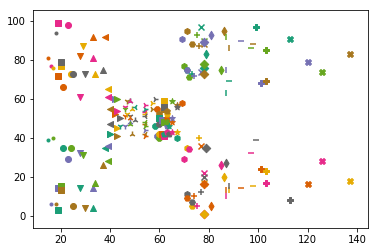

Merging clusters # 64 67
Merging clusters # 127 129
Merging clusters # 153 155
Merging clusters # 21 23
Merging clusters # 49 51
Merging clusters # 57 58
Merging clusters # 59 61
Merging clusters # 60 61
Merging clusters # 61 62
Merging clusters # 66 69
Merging clusters # 67 68
Merging clusters # 68 70
Merging clusters # 69 71
Merging clusters # 80 85
Merging clusters # 82 85
Merging clusters # 86 91
Merging clusters # 87 94
Merging clusters # 89 90
Merging clusters # 91 96
Merging clusters # 101 102
Merging clusters # 129 135
Merging clusters # 130 134
Merging clusters # 147 151
Merging clusters # 80 85
Merging clusters # 3 5
Merging clusters # 9 11
Merging clusters # 23 25
Merging clusters # 36 38
Merging clusters # 47 50
Merging clusters # 50 53


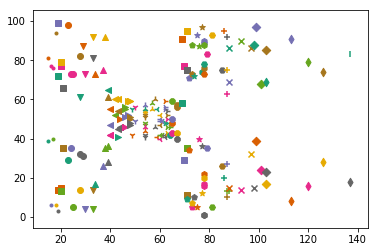

Merging clusters # 56 59
Merging clusters # 72 74
Merging clusters # 83 86
Merging clusters # 97 102
Merging clusters # 106 108
Merging clusters # 115 124
Merging clusters # 59 66
Merging clusters # 60 63
Merging clusters # 115 117
Merging clusters # 72 75
Merging clusters # 9 12
Merging clusters # 79 84
Merging clusters # 76 81
Merging clusters # 49 53
Merging clusters # 2 5
Merging clusters # 10 11
Merging clusters # 62 65
Merging clusters # 73 76
Merging clusters # 76 77
Merging clusters # 87 89
Merging clusters # 90 92
Merging clusters # 102 105
Merging clusters # 105 107
Merging clusters # 112 118
Merging clusters # 117 121
Merging clusters # 0 4
Merging clusters # 40 42
Merging clusters # 59 61
Merging clusters # 61 66
Merging clusters # 80 84


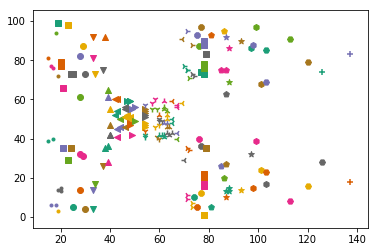

Merging clusters # 84 87
Merging clusters # 94 101
Merging clusters # 104 108
Merging clusters # 117 119
Merging clusters # 121 125
Merging clusters # 122 125
Merging clusters # 66 70
Merging clusters # 62 64
Merging clusters # 83 86
Merging clusters # 54 55
Merging clusters # 55 56
Merging clusters # 46 49
Merging clusters # 70 72
Merging clusters # 60 61
Merging clusters # 30 35
Merging clusters # 82 88
Merging clusters # 10 14
Merging clusters # 21 23
Merging clusters # 59 64
Merging clusters # 64 66
Merging clusters # 61 63
Merging clusters # 24 26
Merging clusters # 35 39
Merging clusters # 68 72
Merging clusters # 89 93
Merging clusters # 41 46
Merging clusters # 33 36
Merging clusters # 38 39
Merging clusters # 57 58
Merging clusters # 40 42


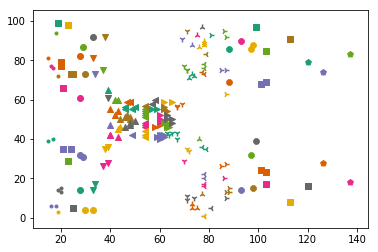

Merging clusters # 73 76
Merging clusters # 52 55
Merging clusters # 26 28
Merging clusters # 30 35
Merging clusters # 2 5
Merging clusters # 81 82
Merging clusters # 46 48
Merging clusters # 32 34
Merging clusters # 36 37
Merging clusters # 3 8
Merging clusters # 38 40
Merging clusters # 7 11
Merging clusters # 39 40
Merging clusters # 32 33
Merging clusters # 42 43
Merging clusters # 47 51
Merging clusters # 45 49
Merging clusters # 52 56
Merging clusters # 58 59
Merging clusters # 39 41
Merging clusters # 50 53
Merging clusters # 35 37
Merging clusters # 39 41
Merging clusters # 46 47
Merging clusters # 49 51
Merging clusters # 20 26
Merging clusters # 52 54
Merging clusters # 29 30
Merging clusters # 14 17
Merging clusters # 61 65


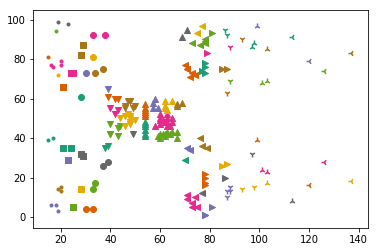

Merging clusters # 1 3
Merging clusters # 36 37
Merging clusters # 24 25
Merging clusters # 10 17
Merging clusters # 58 60
Merging clusters # 30 31
Merging clusters # 35 37
Merging clusters # 46 50
Merging clusters # 3 6
Merging clusters # 11 17
Merging clusters # 8 13
Merging clusters # 47 50
Merging clusters # 25 26
Merging clusters # 12 16
Merging clusters # 33 40
Merging clusters # 4 7
Merging clusters # 31 35
Merging clusters # 39 41
Merging clusters # 9 13
Merging clusters # 48 50
Merging clusters # 29 34
Merging clusters # 6 7
Merging clusters # 26 31
Merging clusters # 17 20
Merging clusters # 41 42
Merging clusters # 40 45
Merging clusters # 22 23
Merging clusters # 17 19
Merging clusters # 46 48
Merging clusters # 4 7


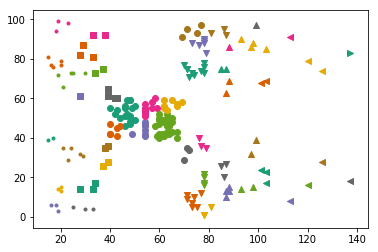

Merging clusters # 23 27
Merging clusters # 33 35
Merging clusters # 29 34
Merging clusters # 13 14
Merging clusters # 21 25
Merging clusters # 24 26
Merging clusters # 28 29
Merging clusters # 2 5
Merging clusters # 17 19
Merging clusters # 1 4
Merging clusters # 15 17
Merging clusters # 21 23
Merging clusters # 25 27
Merging clusters # 29 31
Merging clusters # 7 9
Merging clusters # 12 13
Merging clusters # 15 20
Merging clusters # 5 6
Merging clusters # 0 4
Merging clusters # 11 12
Merging clusters # 9 10
Merging clusters # 15 17
Merging clusters # 2 4
Merging clusters # 4 6
Merging clusters # 11 14
Merging clusters # 21 22
Merging clusters # 15 16
Merging clusters # 14 18
Merging clusters # 18 20
Merging clusters # 1 5


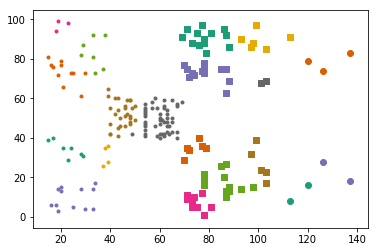

Merging clusters # 11 12
Merging clusters # 0 5
Merging clusters # 1 4
Merging clusters # 4 5
Merging clusters # 5 7
Merging clusters # 11 13
Merging clusters # 8 10
Merging clusters # 1 3
Merging clusters # 5 6
Merging clusters # 0 2
Merging clusters # 4 6
Merging clusters # 3 5


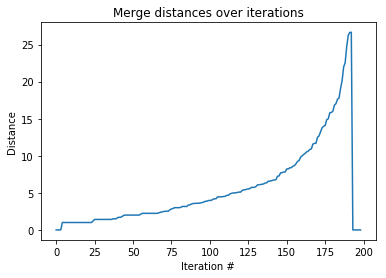

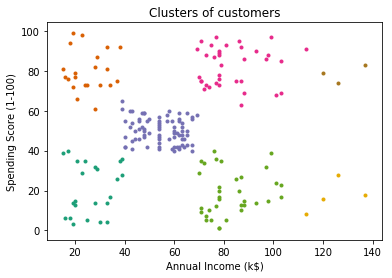

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matplotlib import markers
import itertools


# finds indices of closest clusters to be merged on next iteration
# clusters_matrix - clusters matrix
# distance_col, cluster_col - ids of columns keeping min distance and closest cluster id
# returns cluster indices and distance between them

def find_clusters_to_merge(clusters_matrix, distance_col, cluster_col):
    c1_ind=np.argmin(clusters_matrix[:,distance_col])
    c2_ind=clusters_matrix[c1_ind, cluster_col].astype(int)
    distance=clusters_matrix[c1_ind, distance_col]
    return c1_ind, c2_ind, distance

# performs merge of clusters with indices c1_index, c2_index
# updates single-linkage distances in clusters_matrix
# updates cluster membership column in X_matrix
# c1_index, c2_index - indices of clusters to be merged
# X_matrix - data + cluster membership column
# distance_col, cluster_col - ids of columns keeping min distance and closest cluster id
# distances_matrix - initial pairwise distances matrix, good implementation doesn't need it in this method

def single_link_merge(c1_index, c2_index, X_matrix, clusters_matrix, distance_col, cluster_col, distances_matrix):
    num_points = clusters_matrix.shape[0]

    if c1_index>c2_index:
        temp=c1_index
        c1_index=c2_index
        c2_index=temp
    
    for i in range(num_points):
        if clusters_matrix[i, c1_index] > clusters_matrix[i, c2_index]:
            clusters_matrix[i, c1_index]=clusters_matrix[i, c2_index]
            
    for j in range (num_points):
        if clusters_matrix[c1_index, j] > clusters_matrix[c2_index, j]:
            clusters_matrix[c1_index, j]=clusters_matrix[c2_index, j]
            
    clusters_matrix=np.delete(clusters_matrix, c2_index, 1)
    clusters_matrix=np.delete(clusters_matrix, c2_index, 0)
    np.fill_diagonal(clusters_matrix, np.inf)
    num_points = clusters_matrix.shape[0]

    for i in range(len(X_matrix[:,2])):
        if X_matrix[i, 2]==c2_index:
            X_matrix[i, 2]=c1_index
        if X_matrix[i,2]>c2_index:
            X_matrix[i,2]=X_matrix[i,2]-1
        
    distance_col-=1
    cluster_col-=1
    
    clusters_matrix[:, cluster_col] = np.argmin(clusters_matrix[:, :num_points], axis=1)
    clusters_matrix[:, distance_col] = np.amin(clusters_matrix[:, :num_points], axis=1)
    
    return  X_matrix, clusters_matrix, distance_col, cluster_col

# performs merge of clusters with indices c1_index, c2_index
# updates complete-linkage distances in clusters_matrix
# updates cluster membership column in X_matrix
# c1_index, c2_index - indices of clusters to be merged
# X_matrix - data + cluster membership column
# distance_col, cluster_col - ids of columns keeping min distance and closest cluster id
# distances_matrix - initial pairwise distances matrix, good implementation doesn't need it in this method

def complete_link_merge(c1_index, c2_index, X_matrix, clusters_matrix, distance_col, cluster_col, distances_matrix):
    num_points = clusters_matrix.shape[0]

    if c1_index>c2_index:
        temp=c1_index
        c1_index=c2_index
        c2_index=temp
    
    for i in range(num_points):
        if clusters_matrix[i, c1_index] < clusters_matrix[i, c2_index]:
            clusters_matrix[i, c1_index]=clusters_matrix[i, c2_index]
            
    for j in range (num_points):
        if clusters_matrix[c1_index, j] < clusters_matrix[c2_index, j]:
            clusters_matrix[c1_index, j]=clusters_matrix[c2_index, j]
            
    clusters_matrix=np.delete(clusters_matrix, c2_index, 1)
    clusters_matrix=np.delete(clusters_matrix, c2_index, 0)
    np.fill_diagonal(clusters_matrix, np.inf)
    num_points = clusters_matrix.shape[0]

    for i in range(len(X_matrix[:,2])):
        if X_matrix[i, 2]==c2_index:
            X_matrix[i, 2]=c1_index
        if X_matrix[i,2]>c2_index:
            X_matrix[i,2]=X_matrix[i,2]-1
        
    distance_col-=1
    cluster_col-=1
    
    clusters_matrix[:, cluster_col] = np.argmin(clusters_matrix[:, :num_points], axis=1)
    clusters_matrix[:, distance_col] = np.amin(clusters_matrix[:, :num_points], axis=1)
    
    return  X_matrix, clusters_matrix, distance_col, cluster_col

# performs merge of clusters with indices c1_index, c2_index
# updates average-linkage distances in clusters_matrix
# updates cluster membership column in X_matrix
# c1_index, c2_index - indices of clusters to be merged
# X_matrix - data + cluster membership column
# distance_col, cluster_col - ids of columns keeping min distance and closest cluster id
# distances_matrix - initial pairwise distances matrix, use it for this method

def average_link_merge(c1_index, c2_index, X_matrix, clusters_matrix, distance_col, cluster_col, distance_matrix):
    num_points = clusters_matrix.shape[0]

    if c1_index>c2_index:
        temp=c1_index
        c1_index=c2_index
        c2_index=temp
    
        
    for i in range(num_points):
        dist=0
        m=0
        for j in range (X_matrix.shape[0]):
            if X_matrix[j, 2]==i:
                for k in range(X_matrix.shape[0]):
                    if X_matrix[k, 2]==c1_index or X_matrix[k, 2]==c2_index:
                        dist+=distance_matrix[j, k]
                        m+=1
        dist=dist/m
        clusters_matrix[i, c1_index]=dist
            
    for j in range (num_points):
        dist=0
        m=0
        for i in range (X_matrix.shape[0]):
            if X_matrix[i, 2]==j:
                for k in range(X_matrix.shape[0]):
                    if X_matrix[k, 2]==c1_index or X_matrix[k, 2]==c2_index:
                        dist+=distance_matrix[i, k]
                        m+=1
        dist=dist/m
        clusters_matrix[c1_index, j]=dist
            
    clusters_matrix=np.delete(clusters_matrix, c2_index, 1)
    clusters_matrix=np.delete(clusters_matrix, c2_index, 0)
    np.fill_diagonal(clusters_matrix, np.inf)
    num_points = clusters_matrix.shape[0]

    for i in range(len(X_matrix[:,2])):
        if X_matrix[i, 2]==c2_index:
            X_matrix[i, 2]=c1_index
        if X_matrix[i,2]>c2_index:
            X_matrix[i,2]=X_matrix[i,2]-1
        
    distance_col-=1
    cluster_col-=1
    
    clusters_matrix[:, cluster_col] = np.argmin(clusters_matrix[:, :num_points], axis=1)
    clusters_matrix[:, distance_col] = np.amin(clusters_matrix[:, :num_points], axis=1)
    
    return  X_matrix, clusters_matrix, distance_col, cluster_col

# the function which performs bottom-up (agglomerative) clustering
# merge_func - one of the three merge functions above, each with different linkage function
# X_matrix - data itself
# threshold - maximum merge distance, we stop merging if we reached it. if None, merge until there only is one cluster
def bottom_up_clustering(merge_func, X_matrix, distances_matrix, threshold=None):
    num_points = X_matrix.shape[0]

    # take dataset, add and initialize column for cluster membership
    X_data = np.c_[X_matrix, np.arange(0, num_points, 1)]

    # create clusters matrix, initially consisting of all points and pairwise distances
    # with last columns being distance to closest cluster and id of that cluster
    clusters = np.c_[distances_matrix, np.zeros((num_points, 2))]

    # ids of added columns - column with minimal distances, column with closest cluster ids
    dist_col_id = num_points
    clust_col_id = num_points + 1

    # calculate closest clusters and corresponding distances for each cluster
    clusters[:, clust_col_id] = np.argmin(clusters[:, :num_points], axis=1)
    clusters[:, dist_col_id] = np.amin(clusters[:, :num_points], axis=1)

    # array for keeping distances between clusters that we are merging
    merge_distances = np.zeros(num_points - 1)
    # main loop. at each step we are identifying and merging two closest clusters (wrt linkage function)
    for i in range(0, num_points - 1):
        c1_id, c2_id, distance = find_clusters_to_merge(clusters, dist_col_id, clust_col_id)
        # if threshold is set, we don't merge any further if we reached the desired max distance for merging
        if threshold is not None and distance > threshold:
            break
        merge_distances[i] = distance
        X_data, clusters, dist_col_id, clust_col_id= merge_func(c1_id, c2_id, X_data, clusters, dist_col_id, clust_col_id, distances_matrix)

         #uncomment when testing
        print("Merging clusters #", c1_id, c2_id)
        if i%30 == 0:
            for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
               plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker, label=k)
            plt.show()

    # todo use the plot below to find the optimal threshold to stop merging clusters
    plt.plot(np.arange(0, num_points - 1, 1), merge_distances[:num_points - 1])
    plt.title("Merge distances over iterations")
    plt.xlabel("Iteration #")
    plt.ylabel("Distance")
    plt.show()

    for k, (marker, color) in zip(range(num_points), itertools.product(markers, colormap)):
        plt.scatter(X_data[X_data[:, 2] == k, 0], X_data[X_data[:, 2] == k, 1], color=color, marker=marker)
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()


# importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# creating and populating matrix for storing pairwise distances
# diagonal elements are filled with np.inf to ease further processing
distances = squareform(pdist(X, metric='euclidean'))
np.fill_diagonal(distances, np.inf)

# seting up colors and marker types to use for plotting
markers = markers.MarkerStyle.markers
colormap = plt.cm.Dark2.colors

# performing bottom-up clustering with three different linkage functions
# todo set your own thresholds for each method.
# todo find thresholds by looking at plot titled "Merge distances over iterations" when threshold is set to None

#bottom_up_clustering(single_link_merge, X, distances, threshold=None)
#we see that the best threshold  for the single_link_merge is threshold =10 (when there is a jump in distance)
#bottom_up_clustering(single_link_merge, X, distances, threshold=10)

#bottom_up_clustering(complete_link_merge, X, distances, threshold=None)
#we see that the best threshold  for the complete_link_merge is threshold =60 (when there is a jump in distance)
#bottom_up_clustering(complete_link_merge, X, distances, threshold=60)

#bottom_up_clustering(average_link_merge, X, distances, threshold=None)
#we see that the best threshold  for the average_link_merge is threshold =30 (when there is a jump in distance)
bottom_up_clustering(average_link_merge, X, distances, threshold=30)